## Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
def auc_roc_model(model,X_test,y_test):
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:, 1]
    auc_score = roc_auc_score(y_test,model_probs)
    return auc_score

## Reading Data

In [3]:
if __name__ == '__main__':
    # Change filename here
    filename = 'CM1.arff.txt'

    data = arff.loadarff(filename)
    loaddata = pd.DataFrame(data[0])
    loaddata.head()

## Acquire X and Y values

In [4]:
if __name__ == '__main__':
    software_metrics = np.array(loaddata[['LOC_BLANK','BRANCH_COUNT','CALL_PAIRS','LOC_CODE_AND_COMMENT']])
    labels = np.array(loaddata['Defective'])

## Train Test Split

In [5]:
if __name__ == '__main__':
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(software_metrics, labels, test_size = 0.1)
    y_train = y_train.astype(str)
    y_test = y_test.astype(str)

## Selecting a Model (Logistic Regression)

In [6]:
if __name__ == '__main__':
    from sklearn.linear_model import LogisticRegression

    logreg = LogisticRegression(solver='lbfgs')
    logreg.fit(X_train, y_train)

In [7]:
if __name__ == '__main__':
    predictions = logreg.predict(X_test)
    predictions

## Confusion Matrix

In [8]:
if __name__ == '__main__':
    from sklearn.metrics import confusion_matrix

    pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Predicted Non-Defective', "Predicted Defective"], index=['Actual Non-Defective', 'Actual Defective'])

In [9]:
if __name__ == '__main__':
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')

True Positives: 0
False Positives: 0
True Negatives: 28
False Negatives: 5


## Prediction Possibilities

In [10]:
if __name__ == '__main__':
    random_probs = [0 for _ in range(len(y_test))]
    logreg_probs = logreg.predict_proba(X_test)

Keep probabilities of positive outcome only

In [11]:
if __name__ == '__main__':
    logreg_probs = logreg_probs[:, 1]

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

## Computing AUC values

In [13]:
if __name__ == '__main__':
    random_auc = roc_auc_score(y_test,random_probs)
    logreg_auc = roc_auc_score(y_test,logreg_probs)
    print(f'Random Chance Prediction: ROC AUC = {random_auc}')
    print(f'Logisitc Regression: ROC AUC = {logreg_auc}')

Random Chance Prediction: ROC AUC = 0.5
Logisitc Regression: ROC AUC = 0.6571428571428571


### Computing ROC Curve

In [14]:
if __name__ == '__main__':
    random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label='Y')
    logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs, pos_label='Y')

### Plotting ROC Curve

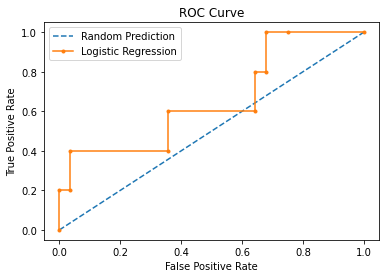

In [15]:
if __name__ == '__main__':
    plt.plot(random_fpr,random_tpr,linestyle='--',label='Random Prediction')
    plt.plot(logreg_fpr,logreg_tpr,marker='.',label='Logistic Regression')

    # Title of Curve
    plt.title('ROC Curve')
    # Axis Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show Legend
    plt.legend()
    # Show Show
    plt.show()